In [ ]:
 ! pip install -q kaggle

In [ ]:


from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lachoubzineddine","key":"31c5fb91dc244b620dcadcfd5fd5ec25"}'}

In [ ]:

!mkdir ~/.kaggle

In [ ]:


!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': Not a directory


In [ ]:


! kaggle competitions download -c 'Object-Detection-for-Football-Stadiums'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!unzip Object-Detection-for-Football-Stadiums.zip

unzip:  cannot find or open Object-Detection-for-Football-Stadiums.zip, Object-Detection-for-Football-Stadiums.zip.zip or Object-Detection-for-Football-Stadiums.zip.ZIP.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/stadium'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

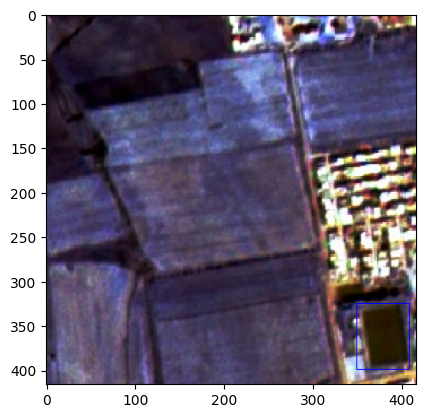

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/stadium/images/train/11300_png.rf.84b21ea1890d6df4828dd806d8b66e66.jpg")
dh, dw, _ = img.shape

fl = open("/content/stadium/labels/train/11300_png.rf.84b21ea1890d6df4828dd806d8b66e66.txt", 'r')
data = fl.readlines()
fl.close()

for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))

    # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
    # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)

    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os

# Define paths
IMAGES_PATH = "/content/stadium/images/train"
LABELS_PATH = "/content/stadium/labels/train"

# Read labels (assuming the label files are .txt)
labels = os.listdir(LABELS_PATH)

# Split data into train, valid, and test sets
train, test = train_test_split(labels, test_size=0.15, shuffle=True)
valid, test = train_test_split(test, test_size=0.2)

print(f"train: {len(train)}; valid: {len(valid)}; test: {len(test)}")

# Create necessary directories in the /kaggle/working directory
os.makedirs("/content/output/images/train", exist_ok=True)
os.makedirs("/content/output/images/val", exist_ok=True)
os.makedirs("/content/output/labels/train", exist_ok=True)
os.makedirs("/content/output/labels/val", exist_ok=True)

def move_files_to_dir(files, dirname):
    for label_filename in files:
        image_filename = f"{label_filename[:-4]}.jpg"  # Assuming image files are in .jpg format
        # Construct paths for image and label files
        image_src = os.path.join(IMAGES_PATH, image_filename)
        label_src = os.path.join(LABELS_PATH, label_filename)

        # Construct target directories
        image_dst_dir = os.path.join("/content/output/images", dirname)
        label_dst_dir = os.path.join("/content/output/labels", dirname)

        # Copy the image and label files to the target directories
        shutil.copy(image_src, os.path.join(image_dst_dir, image_filename))
        shutil.copy(label_src, os.path.join(label_dst_dir, label_filename))

# Move files to train, valid, and test directories
move_files_to_dir(train, "train")
move_files_to_dir(valid, "val")


print("Train Test Split Done!!")

train: 226; valid: 32; test: 8
Train Test Split Done!!


In [ ]:
string = """
train: /content/output/images/train
val: /content/output/images/val
nc : 1
names : ['stadiums']
"""
open("data.yaml","w").write(string)

97

In [ ]:
files.upload()

Saving yolov5-master.zip to yolov5-master.zip


{'yolov5-master.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00qo\x87Y\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0e\x00\t\x00yolov5-master/UT\x05\x00\x01G\xc5TgPK\x03\x04\n\x00\x00\x00\x08\x00qo\x87Yn(Z\xfbd\x06\x00\x00u\x0e\x00\x00\x1b\x00\t\x00yolov5-master/.dockerignoreUT\x05\x00\x01G\xc5Tg\xc5WMs\xdc6\x12\xbd\xe3W\xa0*{\xc8N\x99\xa4\xb3qR\xbb\xba\xa4l\xc9r\xe4\xb2\x1d\x95\xc6q\x0eIj\n\x04{Hh@\x02\x0b\x803b~\xfd\xbe\x06\x87\x9a\xd1\x96OI\xb9\xa2\x03\x07\xe8\xc6G\x7f\xbc~\r}%\xef\xc8\xbb"z\xd2fk\xb4\xbcrzG\xe1\xa6\x1d\\ Y|\xb9?Q\xb6&\x89R+\xdd\x91(MCJ\x84q\x88\xc2\x8d\xc9\x8fIh\xa7\x9d\x88\xc9\x05\xd5R\xd9:\xd7ZR\xde\xc4R\xbb^\x88F%UE\xd5{K\xb1Z\x89\xd5\xaa\n\x14G\x9b\xe2\xaa\xd4q/V\xe5\xbdo\x85\xf8J~\xa01(\x8b\x9ftpa\'\x0fd\xda.\xc5/\xe9U\xf6\x0c\xf6\xacJ\x9f\x96\xdfn\x1e\xb8ax\x98G4\xb4f\xa0y\xdc\xdb\xde5d\xe7\t\xdc\xd5]\xd4\xc1,\x9b\xcf\x04\x8f\x07\xa6\xad5\xe9\xb8\xbb\xfb\xeexI-V\x9b\xa8\xf6\xd4l\xf2q\x15\xa6\x07\xaaO\x13\xe7i\xd8\x9b\xc1-\x12\x04\xe7\x15Yw\x90\x97\xce\x1bj\xe4up

In [ ]:
!unzip /content/yolov5-master.zip

Archive:  /content/yolov5-master.zip
e62a31b601641c5b967226b6b4c44aaee23f99ae
   creating: yolov5-master/
  inflating: yolov5-master/.dockerignore  
  inflating: yolov5-master/.gitattributes  
   creating: yolov5-master/.github/
   creating: yolov5-master/.github/ISSUE_TEMPLATE/
  inflating: yolov5-master/.github/ISSUE_TEMPLATE/bug-report.yml  
  inflating: yolov5-master/.github/ISSUE_TEMPLATE/config.yml  
  inflating: yolov5-master/.github/ISSUE_TEMPLATE/feature-request.yml  
  inflating: yolov5-master/.github/ISSUE_TEMPLATE/question.yml  
  inflating: yolov5-master/.github/dependabot.yml  
   creating: yolov5-master/.github/workflows/
  inflating: yolov5-master/.github/workflows/ci-testing.yml  
  inflating: yolov5-master/.github/workflows/cla.yml  
  inflating: yolov5-master/.github/workflows/docker.yml  
  inflating: yolov5-master/.github/workflows/format.yml  
  inflating: yolov5-master/.github/workflows/links.yml  
  inflating: yolov5-master/.github/workflows/merge-main-into-prs.

In [ ]:
!python /content/yolov5-master/train.py --data /content/data.yaml --epochs 30 --weights '' --cfg /content/yolov5-master/models/yolov5x.yaml --batch-size 16

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 44.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-20 22:29:35.153288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-20 22:29:35.178038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-20 22:29:35.185163

In [ ]:
!python /content/yolov5-master/detect.py --weights /content/yolov5-master/runs/train/exp/weights/best.pt --img 640 --conf 0.17 --source /content/stadium/images/test --save-txt

detect: weights=['/content/yolov5-master/runs/train/exp/weights/best.pt'], source=/content/stadium/images/test, data=yolov5-master/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.17, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-12-7 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/25 /content/stadium/images/test/16715_png.rf.2c55c8b75653166c119e0c46247f3f07.jpg: 640x640 (no detections), 149.3ms
image 2/25 /content/stadium/images/test/16972_png.rf.0763363212f0dbb3a1c6e03dbdc1387e.jpg: 640x640 1 green-houses, 141.9ms
image 3/25 /content/stadium/images/test/

In [ ]:
import os
import pandas as pd

# Define the paths to the labels and images directories
labels_dir = '/content/yolov5-master/runs/detect/exp/labels'
images_dir = '/content/yolov5-master/runs/detect/exp'

# Initialize a list to store CSV rows
submission_data = []

# Loop through the image files in the images directory
for image_file in os.listdir(images_dir):
    if image_file.endswith('.jpg'):  # Ensure we're only processing .jpg files
        image_id = os.path.splitext(image_file)[0]  # Extract the image ID (without extension)
        txt_file = os.path.join(labels_dir, image_id + '.txt')  # Corresponding .txt file for predictions

        # Check if the .txt file exists (it may not exist if no predictions were made)
        if os.path.exists(txt_file):
            with open(txt_file, 'r') as f:
                # Read the bounding box details for this image
                for idx, line in enumerate(f, start=1):
                    # Extract the predicted class label and bounding box details (x_center, y_center, width, height)
                    parts = line.strip().split()  # Split by space
                    class_label = parts[0]  # Class label (assumed to be an integer)
                    x_center = float(parts[1])  # x_center (normalized)
                    y_center = float(parts[2])  # y_center (normalized)
                    width = float(parts[3])  # width (normalized)
                    height = float(parts[4])  # height (normalized)

                    # Create the ImageID_stadiumID format for the submission
                    stadium_id = f"stadium_{idx}"  # Unique ID for each bounding box in the image
                    image_stadium_id = f"{image_id}_stadium_{idx}"

                    # Append the prediction data to the list
                    submission_data.append([image_stadium_id, x_center, y_center, width, height])
        else:
            # If no corresponding .txt file, we set default values (Class 1, default bounding box)
            for idx in range(1, 3):  # Add two entries for each image when no predictions are found
                image_stadium_id = f"{image_id}_stadium_{idx}"
                submission_data.append([image_stadium_id, 0.5, 0.5, 1.0, 1.0])  # Default box

# Create a DataFrame for the CSV file
submission_df = pd.DataFrame(submission_data, columns=['ImageID_stadiumID', 'x_center', 'y_center', 'width', 'height'])

# Save the DataFrame as a CSV file
submission_df.to_csv('/content/submit.csv', index=False)

print("Submission CSV has been created successfully!")

Submission CSV has been created successfully!
